In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
file_path = '/home/andjela/projects/humidity project/weatherHistory.csv'
DF = pd.read_csv(file_path)

In [9]:
DF['Formatted Date'] = pd.to_datetime(DF['Formatted Date'], format='%Y-%m-%d %H:%M:%S.%f %z')

/tmp/ipykernel_12992/3118612332.py:1: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  DF['Formatted Date'] = pd.to_datetime(DF['Formatted Date'], format='%Y-%m-%d %H:%M:%S.%f %z')


In [10]:
start_date = '2006-04-01 00:00:00.000 +0200'
end_date = '2006-04-09 23:00:00.000 +0200'
start_date = pd.to_datetime(start_date, format='%Y-%m-%d %H:%M:%S.%f %z')
end_date = pd.to_datetime(end_date, format='%Y-%m-%d %H:%M:%S.%f %z')

In [11]:
mask = (DF['Formatted Date'] >= start_date) & (DF['Formatted Date'] <= end_date)
filtered_df = DF.loc[mask]

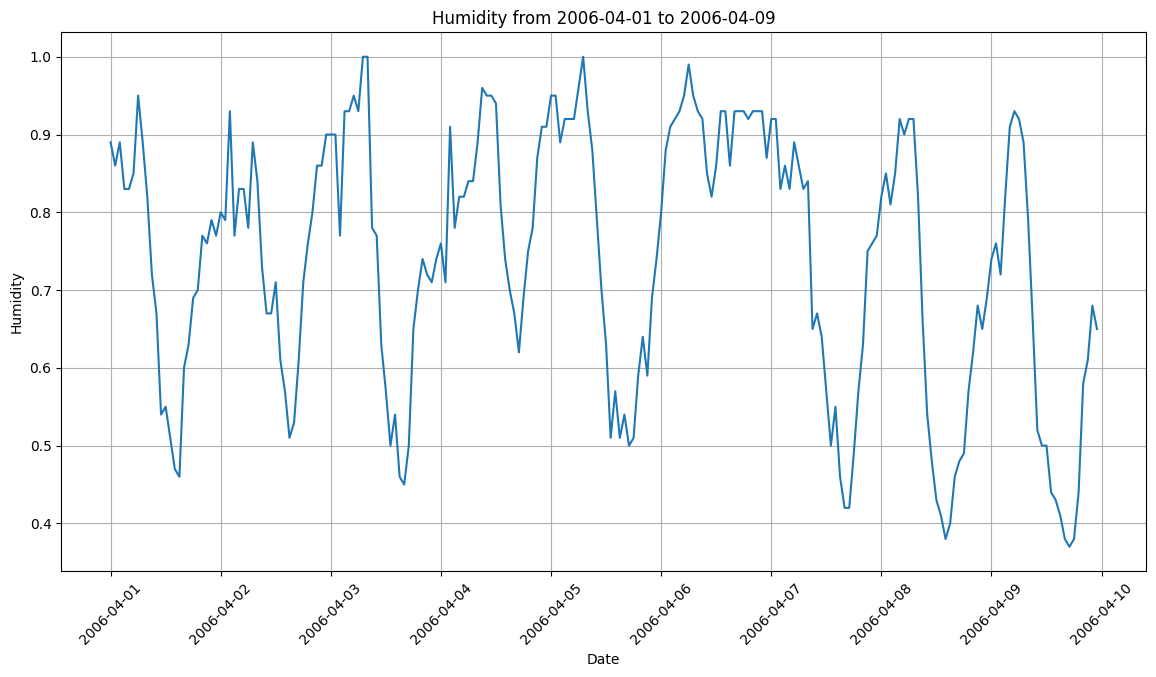

In [12]:
plt.figure(figsize=(14, 7))
sns.lineplot(x='Formatted Date', y='Humidity', data=filtered_df)
plt.title('Humidity from 2006-04-01 to 2006-04-09')
plt.xlabel('Date')
plt.ylabel('Humidity')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()